<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h2>1. T-Test: Does the Charles River affect median home values?<h2/>

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

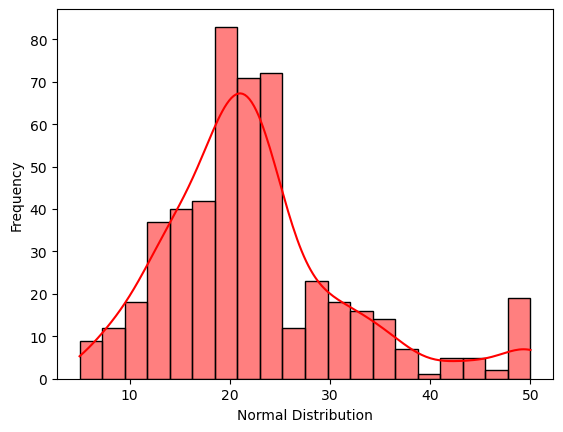

In [8]:
ax = sns.histplot(boston_df['MEDV'], bins=20, kde=True, color='red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   center='mean')
# Since the p-value is > 0.05, we can assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis. There is enough evidence that there is a statistical difference in median home values based on proximity to the Charles River.

<h2>2. ANOVA: Do median values of houses differ by age groups?<h2/>

First, we group the data into categories:

35 years and younger

Between 35 and 70 years

70 years and older

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

State the hypothesis:

$H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)

$H_1:$ At least one of the means differ

In [12]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# Since the p-value is > 0.05, we can assume equality of variance

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [13]:
younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Perform one-way ANOVA

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(younger, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value (1.71e-15) is less than 0.05, we reject the null hypothesis. 
There is significant evidence that median home values differ across age groups.

<h2>3. Pearson Correlation: Is there a relationship between Nitric oxide concentrations and proportion of non-retail business acres?<h2/>

State the hypothesis:

$H_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres

$H_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres

[Text(0.5, 0, 'Proportion of non-retail business acres'),
 Text(0, 0.5, 'Nitric oxide concentrations')]

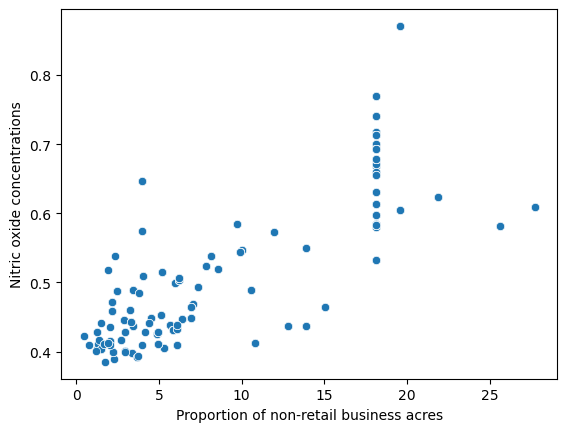

In [15]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set(xlabel='Proportion of non-retail business acres', ylabel='Nitric oxide concentrations')

Perform Pearson correlation test

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis. There is a statistically significant relationship between Nitric oxide concentrations and proportion of non-retail business acres.

<h2>4. Regression Analysis: Impact of distance to employment centers on median home values<h2/>

State the hypothesis:

$H_0:$ Weighted distance to employment centers has no impact on median value of homes

$H_1:$ Weighted distance to employment centers has an impact on median value of homes

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant for intercept
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()

Display regression results

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        20:18:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion: Since the p-value for the DIS coefficient is less than 0.05, we reject the null hypothesis. Weighted distance to employment centers has a statistically significant impact on median home values. The coefficient is positive, indicating that as distance to employment centers increases, median home values also increase.